# Notebook #4: The proxy database

In this script, we'll take a look at one of the LMR inputs: the proxy database.

One of the initial steps of running the LMR is to preprocess the proxy network.  This step puts the data into a standard format and calculates annual-mean values, among other things.  Let's take a look at these standard files.

In [78]:
# A non-python command to make sure all figures are plotted on this page.
%matplotlib inline

In [79]:
# Import the necessary python packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import seaborn as sns
import cartopy.feature as cfeature

In [80]:
# Load the proxy data and metadata using the pandas library.
proxies = pd.read_pickle('../LMR_data/data/proxies/Pages2kv1_Proxies.df.pckl')
metadata = pd.read_pickle('../LMR_data/data/proxies/Pages2kv1_Metadata.df.pckl')

In [81]:
# The "type" and "shape" commands can be used to learn more about the data set.
# The proxy data:
print(type(proxies))
print(proxies.shape)

<class 'pandas.core.frame.DataFrame'>
(2512, 577)


In [82]:
# The proxy metadata:
print(type(metadata))
print(metadata.shape)

<class 'pandas.core.frame.DataFrame'>
(522, 15)


In [83]:
# Let's look at the contents of the proxy file.
print(proxies)

          Ant_01   Ant_02 Ant_03 Ant_04 Ant_05 Ant_06 Ant_07 Ant_08 Ant_09  \
Year C.E.                                                                    
-500         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-499         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-498         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-497         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-496         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...          ...      ...    ...    ...    ...    ...    ...    ...    ...   
 2007        NaN -21.6681    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2008        NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2009        NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2010        NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2011        NaN      NaN    NaN    NaN    NaN    NaN    NaN    

In [84]:
# The "keys" command shows all of the keys for this dataset.
print(proxies.keys())

Index(['Ant_01', 'Ant_02', 'Ant_03', 'Ant_04', 'Ant_05', 'Ant_06', 'Ant_07',
       'Ant_08', 'Ant_09', 'Ant_10',
       ...
       'SAm_14', 'SAm_15', 'SAm_16', 'SAm_17', 'SAm_18', 'SAm_19', 'SAm_20',
       'SAm_21', 'SAm_22', 'SAm_23'],
      dtype='object', length=577)


In [85]:
# Display all of the fields in the metadata file.
print(metadata.keys())

Index(['PAGES 2k Region', 'Proxy ID', 'Country/Region', 'Area', 'Site',
       'Lat (N)', 'Lon (E)', 'Archive type', 'Proxy measurement',
       'Proxy other info', 'Sign relation to temp', 'Oldest (C.E.)',
       'Youngest (C.E.)', 'Resolution (yr)', 'Reference'],
      dtype='object')


In [86]:
# As an example, plot the metadata of the first record.
# Loop through every element of the metadata and print it to screen.
for key in metadata.keys():
    print('%27s : %20s' % (key, metadata.loc[100][key]))

            PAGES 2k Region :                 Asia
                   Proxy ID :              Asi_020
             Country/Region : Altai Mountains (AT)
                       Area :              RUSS139
                       Site :               UKHLWW
                    Lat (N) :                50.15
                    Lon (E) :     85.3666666666667
               Archive type :            Tree ring
          Proxy measurement :       Latewood width
           Proxy other info :                  nan
      Sign relation to temp :             Positive
              Oldest (C.E.) :               1581.0
            Youngest (C.E.) :               1994.0
            Resolution (yr) :                  1.0
                  Reference :    Schweingruber, FH


In [87]:
# We can write some code to search the metadata for a proxy we're interested in.
#search_string = 'Europe'
#field_to_search = 'PAGES 2k Region'

#search_string = 'lake'
#field_to_search = 'Archive type'

# Loop through every key.  If part of the key matches the the search string, print the index and the key.
#n_proxies = metadata.shape[0]
#print('%5s: %20s: %20s: %20s:' % ('index','Site','Country/Region','Archive type'))
#for i in range(n_proxies):
    #if isinstance(metadata.loc[i][field_to_search], basestring):
        #if search_string.lower() in metadata.loc[i][field_to_search].lower():
            #print('%5s: %20s, %20s, %20s' % (i, metadata.loc[i]['Site'], metadata.loc[i]['Country/Region'],\
                                              #metadata.loc[i]['Archive type']))
                        
search_string = 'Asia'
field_to_search = 'PAGES 2k Region'

search_string2 = 'Tree ring'
field_to_search2 = 'Archive type'

# Loop through every key.  If part of the key matches the the search string, print the index and the key.

n_proxies = metadata.shape[0]
print('%5s: %20s: %20s: %20s:' % ('index','Site','Country/Region','Archive type'))

Asia_index = []
count = 0

#calibration to modern observation part of record 
#proxies = proxies.truncate(before=1850, after=2000, axis="index")

for i in range(n_proxies):
    if isinstance(metadata.loc[i][field_to_search], str):
        if search_string.lower() in metadata.loc[i][field_to_search].lower() and search_string2.lower() in metadata.loc[i][field_to_search2].lower():
       # if search_string.lower() in metadata.loc[i][field_to_search].lower():
            print('%5s: %20s, %20s, %20s' % (i, metadata.loc[i]['Site'], metadata.loc[i]['Country/Region'],\
                                              metadata.loc[i]['Archive type']))
            
            count = count+1
            Asia_index = np.append(Asia_index, i)
print(Asia_index)

index:                 Site:       Country/Region:         Archive type:
   81:               AAT2LS, Altai Mountains (AT),            Tree ring
   82:               DJAZLS, Altai Mountains (AT),            Tree ring
   83:               JABELS, Altai Mountains (AT),            Tree ring
   84:               KUR2LS, Altai Mountains (AT),            Tree ring
   85:               KUR3LS, Altai Mountains (AT),            Tree ring
   86:               MSALLS, Altai Mountains (AT),            Tree ring
   87:               NCHALS, Altai Mountains (AT),            Tree ring
   88:               TUT2LS, Altai Mountains (AT),            Tree ring
   89:               UGLALS, Altai Mountains (AT),            Tree ring
   90:               ULAGLS, Altai Mountains (AT),            Tree ring
   91:               UULTRW, Altai Mountains (AT),            Tree ring
   92:               UULEWW, Altai Mountains (AT),            Tree ring
   93:               UULLWW, Altai Mountains (AT),            T

In [88]:
# Choose the index of a record you're interested in.
index_selected = Asia_index
metadata_sub=metadata.iloc[index_selected]

In [89]:
# Loop through every element of the metadata and print it to screen.
for key in metadata.keys():
    print('%27s : %20s' % (key, metadata.loc[index_selected][key]))

            PAGES 2k Region : 81.0            Asia
82.0            Asia
83.0            Asia
84.0            Asia
85.0            Asia
            ...     
320.0    Australasia
322.0    Australasia
324.0    Australasia
329.0    Australasia
334.0    Australasia
Name: PAGES 2k Region, Length: 243, dtype: object
                   Proxy ID : 81.0     Asi_001
82.0     Asi_002
83.0     Asi_003
84.0     Asi_004
85.0     Asi_005
          ...   
320.0     Aus_11
322.0     Aus_13
324.0     Aus_15
329.0     Aus_20
334.0     Aus_25
Name: Proxy ID, Length: 243, dtype: object
             Country/Region : 81.0     Altai Mountains (AT)
82.0     Altai Mountains (AT)
83.0     Altai Mountains (AT)
84.0     Altai Mountains (AT)
85.0     Altai Mountains (AT)
                 ...         
320.0             New Zealand
322.0             New Zealand
324.0             New Zealand
329.0             New Zealand
334.0               Australia
Name: Country/Region, Length: 243, dtype: object
                    

In [90]:
# Get the key of the desired record.
proxyID_selected = metadata.loc[index_selected]['Proxy ID']
print(proxyID_selected)

# Get the data for this record.
proxy_data = proxies[proxyID_selected]

81.0     Asi_001
82.0     Asi_002
83.0     Asi_003
84.0     Asi_004
85.0     Asi_005
          ...   
320.0     Aus_11
322.0     Aus_13
324.0     Aus_15
329.0     Aus_20
334.0     Aus_25
Name: Proxy ID, Length: 243, dtype: object


In [91]:
# Save some useful metadata to new variables.
reference    = metadata.loc[index_selected]['Reference']
site_name    = metadata.loc[index_selected]['Site']
lat          = metadata.loc[index_selected]['Lat (N)']
lon          = metadata.loc[index_selected]['Lon (E)']
archive_type = metadata.loc[index_selected]['Archive type']
measurement  = metadata.loc[index_selected]['Proxy measurement']

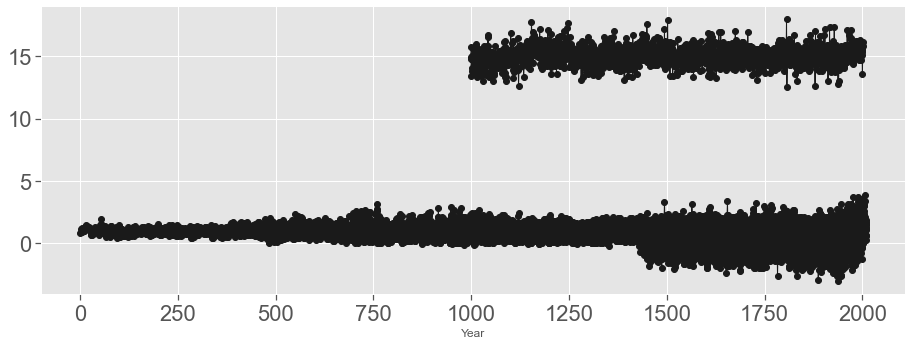

In [92]:
# Make a figure of the proxy record.
plt.style.use('ggplot')

plt.figure(figsize=(15,5))
ax = plt.axes([.1,.1,.8,.8])
plt.plot(proxy_data,color='k',marker='o',linewidth=1)
#plt.title(str(site_name)+" ("+str(archive_type)+").  Lat: "+str(lat)+"$^\circ$N, Lon: "+\
          #str(lon)+"$^\circ$E\nReference: "+reference[0:100])
plt.xlabel("Year")
#plt.ylabel(measurement)
plt.show()

## Further exploration

Search for a different record and look at the results.

### Discussion

Use of data from both proxy records and climate models is crucial to the advancement of paleoclimate research.
* How many of you primarily work with proxy records?
* How many of you primarily work with model output?
* Do you often use data from both areas?

In [93]:
# a bunch of PAGES2k style settings
class PAGES2k(object):
    archive_types = ['Bivalve',
                    'Borehole',
                    'Coral',
                    'Documentary',
                    'Ice core',
                    'Hybrid',
                    'Lake/wetland sediments',
                    'Lake sediment',
                    'Marine sediment',
                    'Marine sediments',
                    'Sclerosponge',
                    'Speleothem',
                    'Tree ring',
                    'Historic',
                    'Instrumental',
                    'Hyrax midden']
    markers = ['p', 'p', 'o', 'v', 'd', '*', 's', 's', '8','8', 'D', '^','h','1','2','3']
    markers_dict = dict(zip(archive_types, markers))
    
    colors = [np.array([ 1.        ,  0.83984375,  0.        ]),
              np.array([ 0.73828125,  0.71484375,  0.41796875]),
              np.array([ 1.        ,  0.546875  ,  0.        ]),
              np.array([ 0.41015625,  0.41015625,  0.41015625]),
              np.array([ 0.52734375,  0.8046875 ,  0.97916667]),
              np.array([ 0.        ,  0.74609375,  1.        ]),
              np.array([ 0.25390625,  0.41015625,  0.87890625]),
              np.array([ 0.25390625,  0.41015625,  0.87890625]),
              np.array([ 0.54296875,  0.26953125,  0.07421875]),
              np.array([ 0.54296875,  0.26953125,  0.07421875]),
              np.array([ 1         ,           0,           0]),
              np.array([ 1.        ,  0.078125  ,  0.57421875]),
              np.array([ 0.1953125 ,  0.80078125,  0.1953125 ]),
              np.array([ 0.1953125 ,  0.80078125,  0.8 ]),
              np.array([ 0.2 ,  0.2,  0.8 ]),
              np.array([ 0.8 ,  0.80078125,  0.8 ])]
    colors_dict = dict(zip(archive_types, colors))

In [94]:
def plot_sites(df, title=None, lon_col='Lon (E)', lat_col='Lat (N)', archiveType_col='Archive type',
               title_size=20, title_weight='bold', figsize=[10, 8], projection=ccrs.Robinson(), markersize=50,
               plot_legend=True, legend_ncol=3, legend_anchor=(0, -0.4), legend_fontsize=15, frameon=False, ax=None):
    
    ''' Plot the location of the sites on a map

    Args:
        df (Pandas DataFrame): the Pandas DataFrame

    Returns:
        ax (Axes): the map plot of the sites

    '''
    p = PAGES2k()
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.subplot(projection=projection)

    sns.set(style="ticks", font_scale=2)

    # plot map
    if title:
        plt.title(title, fontsize=title_size, fontweight=title_weight)
        plt.title("Tree Rings in Asia")
    ax.set_global()
    ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
    ax.gridlines(edgecolor='gray', linestyle=':')

    # plot markers by archive types
    s_plots = []
    type_names = []
    df_archiveType_set = np.unique(df[archiveType_col])
    for type_name in df_archiveType_set:
        selector = df[archiveType_col] == type_name
        type_names.append(f'{type_name} (n={len(df[selector])})')
        s_plots.append(
            ax.scatter(
                df[selector][lon_col], df[selector][lat_col], marker=p.markers_dict[type_name],
                c=p.colors_dict[type_name], edgecolor='k', s=markersize, transform=ccrs.PlateCarree()
            )
        )

    # plot legend
    if plot_legend:
        plt.legend(
            s_plots, type_names,
            scatterpoints=1,
            bbox_to_anchor=legend_anchor,
            loc='lower left',
            ncol=legend_ncol,
            frameon=frameon,
            fontsize=legend_fontsize
        )

    return ax

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


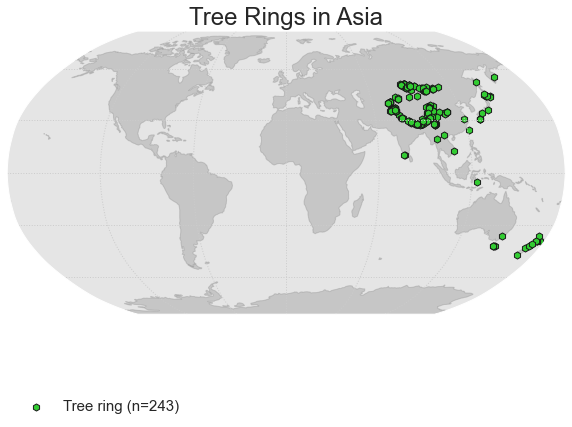

In [95]:
# Plot map of proxy data
ax = plot_sites(metadata_sub, title=f'PAGES2k Network (n={len(metadata)})')